In [1]:
import torch
from torch import optim, nn
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()

])

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = data_transform
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = data_transform
)



train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_data_loader = DataLoader(test_data, batch_size = 64, shuffle = True)


100%|██████████| 26421880/26421880 [00:02<00:00, 13162774.14it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273712.93it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1790380.15it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8108252.72it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



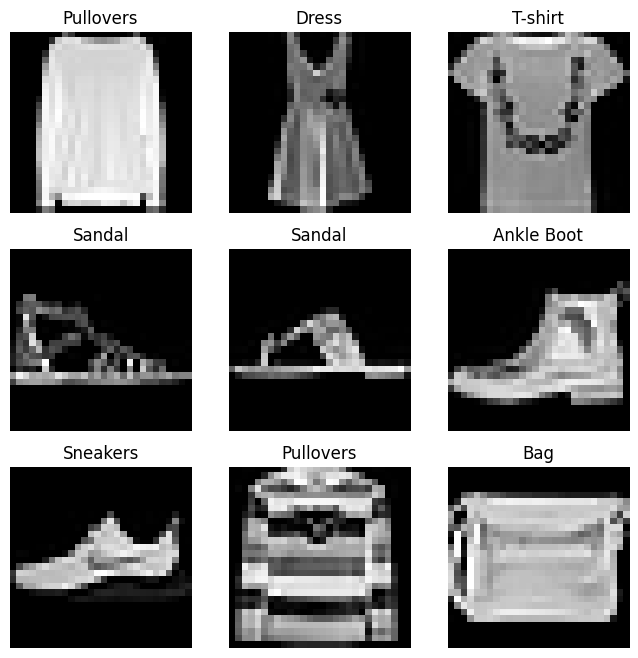

In [2]:
lables_map = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullovers',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneakers',
    8: 'Bag',
    9: 'Ankle Boot',
}


figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

for i in range(1, cols * rows + 1):
    img = images[i]
    label = labels[i].item()

    figure.add_subplot(rows, cols, i)
    plt.title(lables_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()


In [9]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.layer_stack = nn.Sequential(
      nn.Conv2d(1,5,3),
      nn.ReLU(),
      nn.Conv2d(5,10,3),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(10 * 24 * 24, 120),
      nn.Linear(120, 84),
      nn.Linear(84, 10),
    )

  def forward(self, x):
    return self.layer_stack(x)

model = SimpleCNN()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Đặt mô hình vào chế độ huấn luyện

    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_dataloader):

        optimizer.zero_grad()  # Đặt gradient về 0
        outputs = model(images)  # Dự đoán đầu ra từ mô hình
        loss = criterion(outputs, labels)  # Tính toán mất mát

        loss.backward()  # Tính toán gradient
        optimizer.step()  # Cập nhật trọng số

        running_loss += loss.item()  # Cộng dồn mất mát

    # In mất mát sau mỗi epoch
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_dataloader):.4f}')

Epoch [10/100], Loss: 0.2087
Epoch [20/100], Loss: 0.1649
Epoch [30/100], Loss: 0.1375
Epoch [40/100], Loss: 0.1263
Epoch [50/100], Loss: 0.1135
Epoch [60/100], Loss: 0.1048
Epoch [70/100], Loss: 0.0975
Epoch [80/100], Loss: 0.0949
Epoch [90/100], Loss: 0.0895
Epoch [100/100], Loss: 0.0862


In [11]:
import torch

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]

    # Lặp qua từng batch trong DataLoader kiểm tra
    for images, labels in test_data_loader:

        outputs = model(images)

        # Tính toán dự đoán
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        # Cập nhật số lượng chính xác và tổng số mẫu cho từng lớp
        for i in range(labels.size(0)):  # Sử dụng kích thước của batch để lặp qua từng mẫu
            label = labels[i].item()  # Chuyển nhãn thành số nguyên
            pred = predicted[i].item()  # Chuyển dự đoán thành số nguyên
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    # Tính toán độ chính xác toàn cục
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc:.2f} %')

    # Tính toán độ chính xác của từng lớp
    for i in range(10):
        if n_class_samples[i] > 0:  # Tránh chia cho 0
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        else:
            acc = 0.0
        print(f'Accuracy of class {i}: {acc:.2f} %')



Accuracy of the network: 88.31 %
Accuracy of class 0: 82.70 %
Accuracy of class 1: 96.70 %
Accuracy of class 2: 84.00 %
Accuracy of class 3: 90.40 %
Accuracy of class 4: 83.40 %
Accuracy of class 5: 94.90 %
Accuracy of class 6: 63.20 %
Accuracy of class 7: 95.30 %
Accuracy of class 8: 96.70 %
Accuracy of class 9: 95.80 %
